In [1]:
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import imagetools as im



## Part I  Bob’s watermarking technique

### 1. What are the shapes of these arrays? What are the ranges of their values?

In [45]:
xalice = plt.imread('assets/img_alice.png')
ybob = plt.imread('assets/img_bob.png')
mask = np.load('assets/mask.npy')
# shape of xalice:
print("Shape of xalice: ", xalice.shape)
# shape of ybob:
print("Shape of ybob: ", ybob.shape)
# shape of mask:
print("Shape of mask: ", mask.shape)

# range of xalice:
print("Range of xalice: ", np.amin(xalice)," ~ ",np.amax(xalice))
# range of ybob:
print("Range of ybob: ", np.amin(ybob)," ~ ",np.amax(ybob))
# range of mask:
print("Range of mask: ", np.amin(mask)," ~ ",np.amax(mask))

Shape of xalice:  (540, 720, 3)
Shape of ybob:  (540, 720, 3)
Shape of mask:  (540, 720, 3)
Range of xalice:  0.0  ~  1.0
Range of ybob:  0.007843138  ~  1.0
Range of mask:  0.0  ~  1.0


### 2. Explain what are the 6 buttons appearing below the picture.

<IPython.core.display.Javascript object>


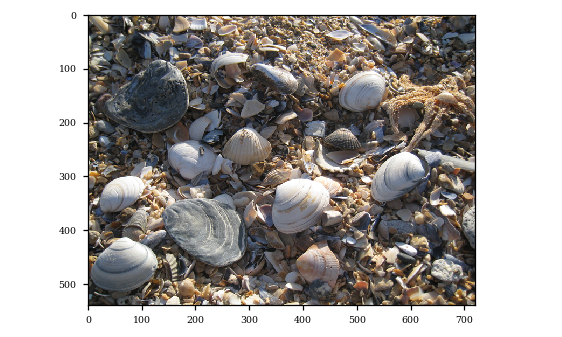

In [46]:
plt.figure()
plt.imshow(xalice)

#### 1. Reset original view
#### 2. Back to previous view
#### 3. Forward to next view
#### 4. Pan axes with left mouse, zoom with right
#### 5. Zoom to rectangle
#### 6. Download plot

### 3. Explain how im.show function differs from imshow.


<IPython.core.display.Javascript object>


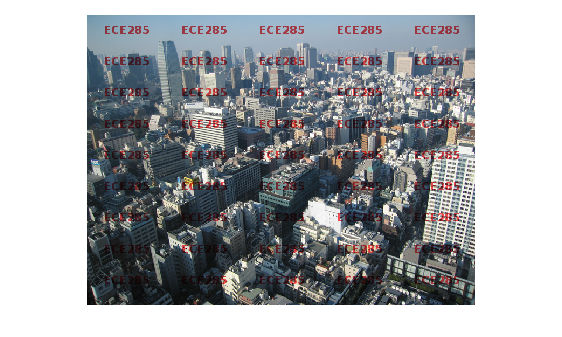

In [73]:
plt.figure()
im.show(ybob)

Using im.show function, there will be no axis at the edge of figure

### 4. Explain what does each command do.

<IPython.core.display.Javascript object>


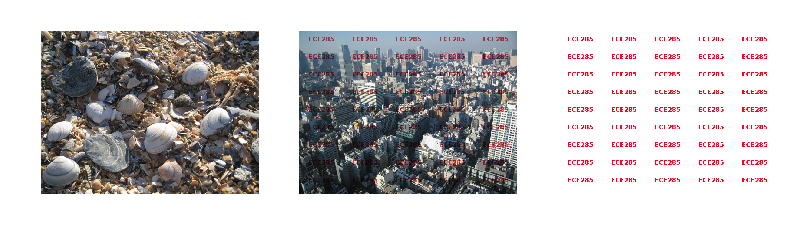

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(7, 2))
im.show(xalice, ax=axes[0])
im.show(ybob, ax=axes[1])
im.show(mask, ax=axes[2])
fig.show()

#### 1. plt.subplots can create multiple small figure in a large figure. ncols set the number of figures along the column and figsize set the size of each small figure
#### 2. im.show is the function use to display the target image. we set xalice on axes[0], ybob on axes[1] and mask on axes[2]
#### 3. display the whole figure

### 5. Implement equation (1) as a function

In [6]:
def watermark(x, mask, p):
    lambda_k = 1/((1-p)*mask + p)
    y = lambda_k * x
    return y

### 6. Display yalice

<IPython.core.display.Javascript object>


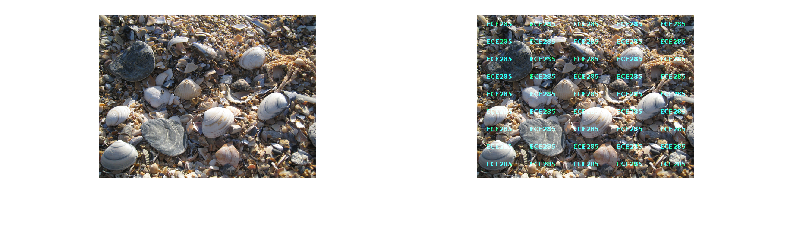

In [83]:
p = 0.1
yalice = watermark(xalice, mask, p)
fig, axes = plt.subplots(ncols=2, figsize=(7, 2))
im.show(xalice, ax=axes[0])
im.show(yalice, ax=axes[1])
axes[0].set_xlabel('(a) original image x')
axes[1].set_xlabel('(b) Watermarked image with p = 0.1')
fig.show()

### 7. Run the following code snippet

<IPython.core.display.Javascript object>


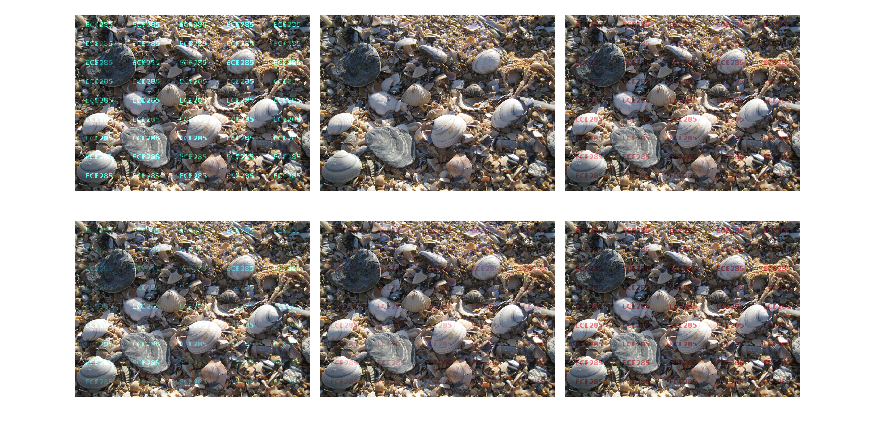

In [86]:
# create a 2 by 3 subplot for displaying 6 image
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 3),sharex='all', sharey='all')
# display six image with different value of p
for k in range(6):
    im.show(watermark(xalice, mask, p=(k+1)/3), ax=axes[k % 2][int(k / 2)])
    axes[k % 2][int(k / 2)].set_xlabel('p='+str((k+1)/3))
fig.show()

The color of float on each image change from blue to red as we look at the image from left to right. Different color is based on different p. When p is smaller then 1, the color of watermark will become blue and become red when p is greater then 1. When P equals to 1, there will be no watermark on the image.

## Part II Alice’s watermarking removal technique

### 8.Implement equation (2) as a function

In [9]:
def iwatermark(y, m, p):
    x = ((1-p)*m + p) * y
    return x

### 9.Write a function that evaluates equation (3)

In [10]:
def energy(y, m, p):
    m_mean = np.mean(m)
    e = []
    for i in p:
        x = iwatermark(y,m,i)
        x_mean = np.mean(x)
        e.append(np.mean((m-m_mean)*(x-x_mean))**2)
    return e

### 10.Display the curve of energy and check Alice’s assumption

<IPython.core.display.Javascript object>


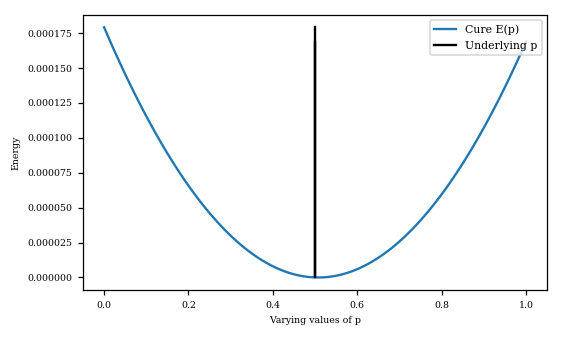

Text(0, 0.5, 'Energy')

In [40]:
p = 0.5
y = watermark(xalice, mask, p)
ptest = np.linspace(0, 2 * p, 100)
e = energy(y,mask,ptest)
plt.figure()
plt.plot(ptest, e, label = 'Cure E(p)')
plt.plot([p]*100, e, label = 'Underlying p', color = 'black')
plt.legend(loc = 'upper right')
plt.xlabel('Varying values of p')
plt.ylabel('Energy')

### 11. Show that the expression of p hat

\begin{align}
    E(p) &= [\frac{1}{n} \sum_k(m_k - \bar{m})(\hat{x_k} - \bar{\mu})]^2 \nonumber \\
    &= [\frac{1}{n} \sum_k(m_k\hat{x_k} - m_k\bar{\mu} - \bar{m}\hat{x_k} + \bar{m}\bar{\mu})]^2 \nonumber \\
    &= [\frac{1}{n} \sum_k(m_k - \bar{m})\hat{x_k} - \bar{\mu}\frac{1}{n} \sum_k m_k + \bar{\mu}\frac{1}{n} \sum_k\bar{\mu}]^2 \nonumber \\
    &= [\frac{1}{n} \sum_k(m_k - \bar{m})\hat{x_k} - \bar{\mu}^2 + \bar{\mu}^2]^2 \nonumber \\
    &= [\frac{1}{n} \sum_k(m_k - \bar{m})\hat{x_k}]^2 \nonumber 
\end{align}
Next we replace x k hat with following equation:
\begin{equation}
    \hat{x_k} = [(1 - \hat{p})m_k + \hat{p}]y_k
\end{equation}
Then we have:
\begin{align}
    E(p) &= [\frac{1}{n} \sum_k(m_k - \bar{m})\hat{x_k}]^2 \nonumber \\
    &= [\frac{1}{n} \sum_k(m_k - \bar{m})[(1 - \hat{p})m_k + \hat{p}]y_k]^2 \nonumber \\
    &= [\frac{1}{n} \sum_k m_k(m_k - \bar{m}) y_k + \frac{1}{n} \sum_k \hat{p}(1 - m_k)(m_k - \bar{m})y_k]^2 \nonumber \\
    &= [\frac{1}{n} \sum_k m_k(m_k - \bar{m}) y_k + \hat{p}\frac{1}{n} \sum_k (1 - m_k)(m_k - \bar{m})y_k]^2 \nonumber \\
    &= 0 \nonumber
\end{align}
     
\begin{align}
    \hat{p} &= -\frac{\sum_k m_k y_k}{\sum_k (1 - m_k) y_k} \nonumber \\
    &=  -\frac{\sum_k \alpha_k y_k}{\sum_k \beta_k y_k} \nonumber
\end{align}



### 12. Implement equation (4) as a function

<IPython.core.display.Javascript object>


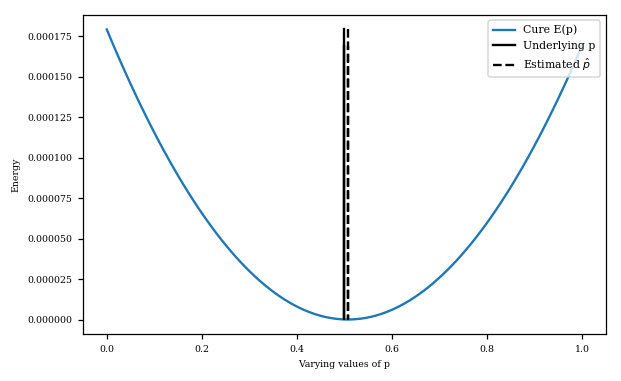

Text(0, 0.5, 'Energy')

In [39]:
def estimate_p(y,m):
    p = -np.sum(m*(m-np.mean(m))*y)/np.sum((1-m)*(m-np.mean(m))*y)
    return p
p_hat = estimate_p(y,mask)

plt.figure()
plt.plot(ptest, e, label = 'Cure E(p)')
plt.plot([p]*100, e, label = 'Underlying p', color = 'black')
plt.plot([p_hat]*100, e, 'k--', label = 'Estimated ' + '$\hat{p}$')
plt.legend(loc = 'upper right')
plt.xlabel('Varying values of p')
plt.ylabel('Energy')

### 13. Write the code to remove the watermark in the image ybob.

In [71]:
p_hat = estimate_p(ybob,mask)
xbob = iwatermark(ybob, mask, p_hat)

p that Bob is using is 3.141587142, and xbob is the result that removing watermark from ybob

### 14.  Display next to each other ybob and your estimation of xbob

<IPython.core.display.Javascript object>


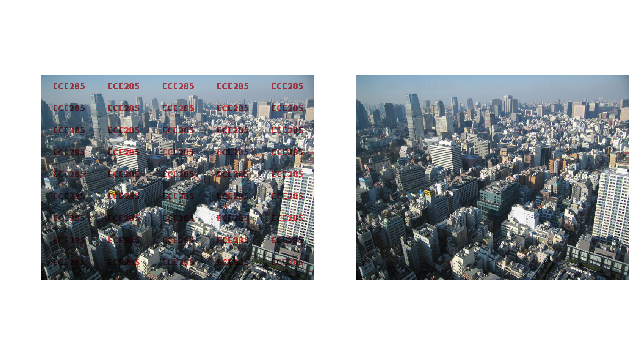

In [72]:
fig, axes = plt.subplots(ncols=2)
im.show(ybob,ax=axes[0])
im.show(xbob,ax=axes[1])
axes[0].set_xlabel("ybob")
axes[1].set_xlabel("xbob")
fig.show()

### 15. Who is right Alice or Bob?

Apparently, Alice's technique is better then Bob.